In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



In [2]:
df = pd.read_csv('maison_prix.csv')
df.head()

,surface_m2,nombre_chambres,etage,age_maison,prix_milliers_euros
0,94,4,0,13,166.07
1,97,1,4,5,160.52
2,114,3,5,21,179.46
3,117,4,5,9,211.07
4,117,1,6,15,172.78


In [39]:
df.describe()


,surface_m2,nombre_chambres,etage,age_maison,prix_milliers_euros
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,107.166667,2.766667,4.700000,12.400000,181.062333
std,26.311245,1.222866,2.731048,7.708482,38.630938
min,59.000000,1.000000,0.000000,1.000000,101.120000
25%,87.500000,2.000000,3.000000,5.000000,161.907500
50%,116.000000,3.000000,4.000000,13.500000,188.540000
75%,129.750000,4.000000,6.750000,18.000000,212.780000
max,138.000000,4.000000,9.000000,27.000000,236.830000


In [40]:
X = df.drop("prix_milliers_euros", axis=1)
y = df["prix_milliers_euros"]
print(X)



    surface_m2  nombre_chambres  etage  age_maison
0           94                4      0          13
1           97                1      4           5
2          114                3      5          21
3          117                4      5           9
4          117                1      6          15
5           59                2      8          16
6          133                4      4          21
7           71                2      1           4
8           86                4      4          27
9          137                4      9          24
10         120                3      8          16
11         138                4      1          14
12         138                1      1          22
13          62                2      7          22
14         108                2      9          17
15         115                2      9          18
16          89                4      3           6
17         137                1      6          10
18          96                4

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [43]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [45]:
y_pred = model.predict(X_test_scaled)

print("MSE :", mean_squared_error(y_test, y_pred))
print("R2 :", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
r_squared_adjusted = 1 - (1 - r2_score(y_test, y_pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print("R2 ajusté :", r_squared_adjusted)


MSE : 68.3441090176557
R2 : 0.9016428933659215
MAE : 6.364232626185877
R2 ajusté : 0.5082144668296076


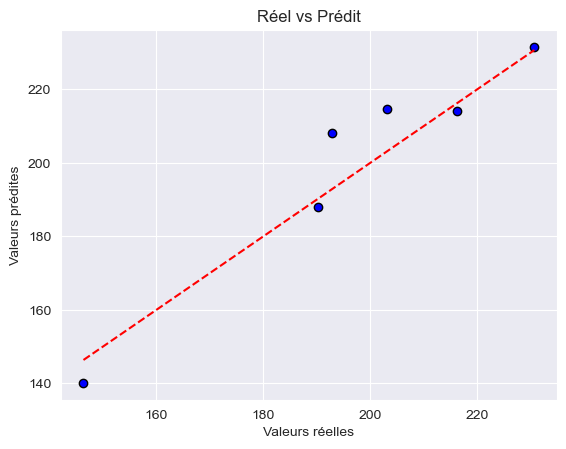

In [48]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color="blue", edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Réel vs Prédit")
plt.grid(True)
plt.show()


In [55]:
nouvelles_donnees = pd.DataFrame([
    [85, 3, 2, 10],
    [120, 4, 0, 3],
    [60, 2, 0, 20],
    [100, 5, 3, 4]
], columns=['surface_m2', 'nombre_chambres', 'etage', 'age_maison'])

nouvelles_donnees_scaled = scaler.transform(nouvelles_donnees)
predictions = model.predict(nouvelles_donnees_scaled)

print("Prédictions des prix :", predictions)


Prédictions des prix : [148.23802398 214.86954893  82.37722797 201.1740552 ]
